## Functions
Before you can understand decorators, you must first understand how functions work. For our purposes, a function returns a value based on the given arguments. Here is a very simple example:

In [1]:
def add_one(number):
    return number + 1

add_one(2)

3

In general, functions in Python may also have side effects rather than just turning an input into an output. The print() function is a basic example of this: it returns None while having the side effect of outputting something to the console. However, to understand decorators, it is enough to think about functions as something that turns given arguments into a value.

Note: In functional programming, you work (almost) only with pure functions without side effects. While not a purely functional language, Python supports many of the functional programming concepts, including functions as first-class objects.

## First-Class Objects
In Python, functions are [first-class](https://dbader.org/blog/python-first-class-functions) objects `( In Python, functions are “first-class citizens.” This means that they are on par with any other object (integers, strings, lists, modules, and so on). You can dynamically create or destroy them, pass them to other functions, return them as values, and so forth)`. This means that functions can be passed around and used as arguments, just like any other object (string, int, float, list, and so on). Consider the following three functions:

In [2]:
def say_hello(name):
    return f"Hello {name}"

def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def greet_bob(greeter_func):
    return greeter_func("Bob")

Here, say_hello() and be_awesome() are regular functions that expect a name given as a string. The greet_bob() function however, expects a function as its argument. We can, for instance, pass it the say_hello() or the be_awesome() function:

In [5]:
print(greet_bob(say_hello))

print(greet_bob(be_awesome))


Hello Bob
Yo Bob, together we are the awesomest!


Note that greet_bob(say_hello) refers to two functions, but in different ways: greet_bob() and say_hello. The say_hello function is named without parentheses. This means that only a reference to the function is passed. The function is not executed. The greet_bob() function, on the other hand, is written with parentheses, so it will be called as usual.

******
## Inner Functions
It’s possible to define functions inside other functions. Such functions are called [inner functions](https://realpython.com/inner-functions-what-are-they-good-for/). Here’s an example of a function with two inner functions:

In [ ]:
# Encapsulation
#You use inner functions to protect them from everything happening outside of the function, 
# bmeaning that they are hidden from the global scope.

def factorial(number):

    # Error handling
    if not isinstance(number, int):
        raise TypeError("Sorry. 'number' must be an integer.")
    if not number >= 0:
        raise ValueError("Sorry. 'number' must be zero or positive.")

    def inner_factorial(number):
        if number <= 1:
            return 1
        return number*inner_factorial(number-1)
    return inner_factorial(number)

# Call the outer function.
print(factorial(4))

# One main advantage of using this design pattern is that by performing all argument 
# checking in the outer function, you can safely skip error checking altogether in the 
# inner function.

In [ ]:
# Keepin’ it DRY
# Perhaps you have a giant function that performs the same chunk of code in numerous 
# places. For example, you might write a function that processes a file, and you want 
# to accept either an open file object or a file name:

def process(file_name):
    def do_stuff(file_process):
        for line in file_process:
            print(line)
    if isinstance(file_name, str):
        with open(file_name, 'r') as f:
            do_stuff(f)
    else:
        do_stuff(file_name)




In [ ]:
# Closures and Factory Functions
# A closure simply causes the inner function to remember the state of its environment when 
# called. Beginners often think that a closure is the inner function, but it’s really 
# caused by the inner function. The closure “closes” the local variable on the stack, and 
# this stays around after the stack creation has finished executing.

def generate_power(number):
    """
    Examples of use:

    >>> raise_two = generate_power(2)
    >>> raise_three = generate_power(3)
    >>> print(raise_two(7))
    128
    >>> print(raise_three(5))
    243
    """

    # Define the inner function ...
    def nth_power(power):
        return number ** power
    # ... that is returned by the factory function.

    return nth_power





#### What’s Happening in the Example
Let’s take a look at what is going on in that example:

1. generate_power() is a factory function, which simply means that it creates a new function each time it is called and then returns the newly created function. Thus, raise_two() and raise_three() are the newly created functions.
2. What does this new, inner function do? It takes a single argument, power, and returns number**power.
3. Where does the inner function get the value of number from? This is where the closure comes into play: nth_power() gets the value of power from the outer function, the factory function. Let’s step through this process:

- Call the outer function: generate_power(2).
- Build nth_power(), which takes a single argument power.
- Take a snapshot of the state of nth_power(), which includes number=2.
- Pass that snapshot into generate_power().
- Return nth_power().

To put it another way, the closure “initializes” the number bar in nth_power() and then returns it. Now, whenever you call that newly returned function, it will always see its own private snapshot that includes number=2.

#### Conclusion
The use of closures and factory functions is the most common and powerful use for inner functions. In most cases, when you see a decorated function, the decorator is a factory function that takes a function as argument and returns a new function that includes the old function inside the closure. Stop. Take a deep breath. Grab a coffee. Read that again.

To put it another way, a decorator is just syntactic sugar for implementing the process outlined in the generate_power() example.

I’ll leave you with a final example:

In [ ]:
def generate_power(exponent):
    def decorator(f):
        def inner(*args):
            result = f(*args)
            return exponent**result
        return inner
    return decorator


@generate_power(2)
def raise_two(n):
    return n

print(raise_two(7))


@generate_power(3)
def raise_three(n):
    return n

print(raise_two(5))

******
continue to Decorators

It’s possible to define functions inside other functions. Such functions are called inner functions. Here’s an example of a function with two inner functions:


In [6]:
def parent():
    print("Printing from the parent() function")

    def first_child():
        print("Printing from the first_child() function")

    def second_child():
        print("Printing from the second_child() function")

    second_child()
    first_child()

In [7]:
parent()

Printing from the parent() function
Printing from the second_child() function
Printing from the first_child() function


Note that the order in which the inner functions are defined does not matter. Like with any other functions, the printing only happens when the inner functions are executed.

Furthermore, the inner functions are not defined until the parent function is called. They are locally scoped to parent(): they only exist inside the parent() function as local variables. Try calling first_child(). You should get an error:

In [8]:
second_child()

NameError: name 'second_child' is not defined

Whenever you call parent(), the inner functions first_child() and second_child() are also called. But because of their local scope, they aren’t available outside of the parent() function.
## Returning Functions From Functions
Python also allows you to use functions as return values. The following example returns one of the inner functions from the outer parent() function:

In [9]:
def parent(num):
    def first_child():
        return "Hi, I am Emma"

    def second_child():
        return "Call me Liam"

    if num == 1:
        return first_child
    else:
        return second_child

Note that you are returning first_child without the parentheses. Recall that this means that you are returning a reference to the function first_child. In contrast first_child() with parentheses refers to the result of evaluating the function. This can be seen in the following example:

In [10]:
first = parent(1)
second = parent(2)

In [13]:
first

<function __main__.parent.<locals>.first_child()>

The somewhat cryptic output simply means that the first variable refers to the local first_child() function inside of parent(), while second points to second_child().

You can now use first and second as if they are regular functions, even though the functions they point to can’t be accessed directly:

In [15]:
second()

'Call me Liam'

Finally, note that in the earlier example you executed the inner functions within the parent function, for instance first_child(). However, in this last example, you did not add parentheses to the inner functions—first_child—upon returning. That way, you got a reference to each function that you could call in the future. Make sense?

## Simple Decorators
Now that you’ve seen that functions are just like any other object in Python, you’re ready to move on and see the magical beast that is the Python decorator. Let’s start with an example:

In [16]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def say_whee():
    print("Whee!")

say_whee = my_decorator(say_whee)

In [20]:
print(say_whee)
say_whee()

<function my_decorator.<locals>.wrapper at 0x1116efd40>
Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In effect, the name say_whee now points to the wrapper() inner function. Remember that you return wrapper as a function when you call my_decorator(say_whee):

However, wrapper() has a reference to the original say_whee() as func, and calls that function between the two calls to print().

Put simply: **decorators wrap a function, modifying its behavior.**

## Syntactic Sugar!
The way you decorated say_whee() above is a little clunky. First of all, you end up typing the name say_whee three times. In addition, the decoration gets a bit hidden away below the definition of the function.

Instead, Python allows you to use decorators in a simpler way with the @ symbol, sometimes called the “pie” syntax. The following example does the exact same thing as the first decorator example:

In [24]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_whee(astring):
    print("Whee!"+astring)
    
# @my_decorator is just an easier way of saying say_whee = my_decorator(say_whee)

## Reusing Decorators
Recall that a decorator is just a regular Python function. All the usual tools for easy reusability are available. Let’s move the decorator to its own module that can be used in many other functions.

Create a file called decorators.py with the following content:

In [26]:
def do_twice(func):
    def wrapper_do_twice():
        func()
        func()
    return wrapper_do_twice

In [27]:
@do_twice
def say_whee():
    print("Whee!")

In [29]:
say_whee()

Whee!
Whee!


## Decorating Functions With Arguments
Say that you have a function that accepts some arguments. Can you still decorate it? Let’s try:

In [35]:
@do_twice
def greet(name):
    print(f"Hello {name}")

In [31]:
# Unfortunately, running this code raises an error:
greet("World")

TypeError: wrapper_do_twice() takes 0 positional arguments but 1 was given

The problem is that the inner function wrapper_do_twice() does not take any arguments, but name="World" was passed to it. You could fix this by letting wrapper_do_twice() accept one argument, but then it would not work for the say_whee() function you created earlier.

The solution is to use `*args` and `**kwargs` in the inner wrapper function. Then it will accept an arbitrary number of positional and keyword arguments. Rewrite decorators.py as follows:

In [32]:
def do_twice(func):
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
    return wrapper_do_twice

The wrapper_do_twice() inner function now accepts any number of arguments and passes them on to the function it decorates. Now both your say_whee() and greet() examples works:

In [33]:
say_whee()

Whee!
Whee!


In [36]:
greet("World")

Hello World
Hello World


## Returning Values From Decorated Functions
What happens to the return value of decorated functions? Well, that’s up to the decorator to decide. Let’s say you decorate a simple function as follows:

In [37]:
def do_twice(func):
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
    return wrapper_do_twice

@do_twice
def return_greeting(name):
    print("Creating greeting")
    return f"Hi {name}"

In [39]:
hi_adam = return_greeting("Adam")
print(hi_adam)

Creating greeting
Creating greeting
None


Oops, your decorator ate the return value from the function.

Because the do_twice_wrapper() doesn’t explicitly return a value, the call return_greeting("Adam") ended up returning None.

To fix this, you need to **make sure the wrapper function returns the return value of the decorated function**. Change your decorators.py file:

In [41]:
def do_twice(func):
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs) # run the first time
        return func(*args, **kwargs) # run the second time, and return
    return wrapper_do_twice

@do_twice
def return_greeting(name):
    print("Creating greeting")
    return f"Hi {name}"

In [42]:
hi_adam = return_greeting("Adam")
print(hi_adam)

Creating greeting
Creating greeting
Hi Adam


## Who Are You, Really?
A great convenience when working with Python, especially in the interactive shell, is its powerful introspection ability. Introspection is the ability of an object to know about its own attributes at runtime. For instance, a function knows its own name and documentation:

In [43]:
print

<function print>

In [44]:
print.__name__

'print'

In [45]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [50]:
# The introspection works for functions you define yourself as well:
say_whee.__name__

'wrapper_do_twice'

In [51]:
help(say_whee)

Help on function wrapper_do_twice in module __main__:

wrapper_do_twice()



However, after being decorated, say_whee() has gotten very confused about its identity. It now reports being the wrapper_do_twice() inner function inside the do_twice() decorator. Although technically true, this is not very useful information.

To fix this, decorators should use the [@functools.wraps](https://docs.python.org/3/library/functools.html#functools.wraps) decorator, which will preserve information about the original function. Update decorators.py again:

In [55]:
import functools

def do_twice(func):
    @functools.wraps(func)
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args, **kwargs)
    return wrapper_do_twice

@do_twice
def say_whee():
    print("Whee!")


In [56]:
say_whee.__name__

'say_whee'

Technical Detail: The @functools.wraps decorator uses the function functools.update_wrapper() to update special attributes like` __name__` and `__doc__` that are used in the introspection.

## A Few Real World Examples
Let’s look at a few more useful examples of decorators. You’ll notice that they’ll mainly follow the same pattern that you’ve learned so far:

In [57]:
import functools

def decorator(func):
    @functools.wraps(func)
    def wrapper_decorator(*args, **kwargs):
        # Do something before
        value = func(*args, **kwargs)
        # Do something after
        return value
    return wrapper_decorator

#This formula is a good boilerplate template for building more complex decorators.

## Timing Functions
Let’s start by creating a @timer decorator. It will measure the time a function takes to execute and print the duration to the console. Here’s the code:

In [71]:
import functools
import time

def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()    # the time just before the function starts
        value = func(*args, **kwargs)
        end_time = time.perf_counter()      # the time just after the function finishes
        run_time = end_time - start_time    # The time the function takes
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer

@timer
def waste_some_time(num_times):
    for _ in range(num_times):
        a = sum([i**2 for i in range(10000)])
    return a

In [72]:
runtime = waste_some_time(1)

Finished 'waste_some_time' in 0.0027 secs


In [61]:
waste_some_time(999)

Finished 'waste_some_time' in 2.6093 secs


In [73]:
print(runtime)

333283335000


## Debugging Code
The following @debug decorator will print the arguments a function is called with as well as its return value every time the function is called:

In [74]:
import functools

def debug(func):
    """Print the function signature and return value"""
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]                      
        # Create a list of the positional arguments. 
        # Use repr() to get a nice string representing each argument.
        
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]  
        # Create a list of the positional arguments. 
        # Use repr() to get a nice string representing each argument.
        # as key=value where the !r specifier means that repr() is used to 
        # represent the value.
        
        signature = ", ".join(args_repr + kwargs_repr)           
        # The lists of positional and keyword arguments is joined together 
        # to one signature string with each argument separated by a comma.
        
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__!r} returned {value!r}")           
        # The return value is printed after the function is executed.
        
        return value
    return wrapper_debug

In [75]:
@debug
def make_greeting(name, age=None):
    if age is None:
        return f"Howdy {name}!"
    else:
        return f"Whoa {name}! {age} already, you are growing up!"

In [76]:
make_greeting("Benjamin")

Calling make_greeting('Benjamin')
'make_greeting' returned 'Howdy Benjamin!'


'Howdy Benjamin!'

In [77]:
make_greeting("Richard", age=112)

Calling make_greeting('Richard', age=112)
'make_greeting' returned 'Whoa Richard! 112 already, you are growing up!'


'Whoa Richard! 112 already, you are growing up!'

In [78]:
make_greeting(name="Dorrisile", age=116)

Calling make_greeting(name='Dorrisile', age=116)
'make_greeting' returned 'Whoa Dorrisile! 116 already, you are growing up!'


'Whoa Dorrisile! 116 already, you are growing up!'

This example might not seem immediately useful since the @debug decorator just repeats what you just wrote. It’s more powerful when applied to small convenience functions that you don’t call directly yourself.

In [1]:
import math
import functools

def debug(func):
    """Print the function signature and return value"""
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]                      
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]  
        signature = ", ".join(args_repr + kwargs_repr)           
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__!r} returned {value!r}")           
        
        return value
    return wrapper_debug


# Apply a decorator to a standard library function
math.factorial = debug(math.factorial)

def approximate_e(terms=18):
    return sum(1 / math.factorial(n) for n in range(terms))

In [2]:
approximate_e()

Calling factorial(0)
'factorial' returned 1
Calling factorial(1)
'factorial' returned 1
Calling factorial(2)
'factorial' returned 2
Calling factorial(3)
'factorial' returned 6
Calling factorial(4)
'factorial' returned 24
Calling factorial(5)
'factorial' returned 120
Calling factorial(6)
'factorial' returned 720
Calling factorial(7)
'factorial' returned 5040
Calling factorial(8)
'factorial' returned 40320
Calling factorial(9)
'factorial' returned 362880
Calling factorial(10)
'factorial' returned 3628800
Calling factorial(11)
'factorial' returned 39916800
Calling factorial(12)
'factorial' returned 479001600
Calling factorial(13)
'factorial' returned 6227020800
Calling factorial(14)
'factorial' returned 87178291200
Calling factorial(15)
'factorial' returned 1307674368000
Calling factorial(16)
'factorial' returned 20922789888000
Calling factorial(17)
'factorial' returned 355687428096000


2.7182818284590455

This example also shows how you can apply a decorator to a function that has already been defined.The approximation of e is based on the following series expansion:
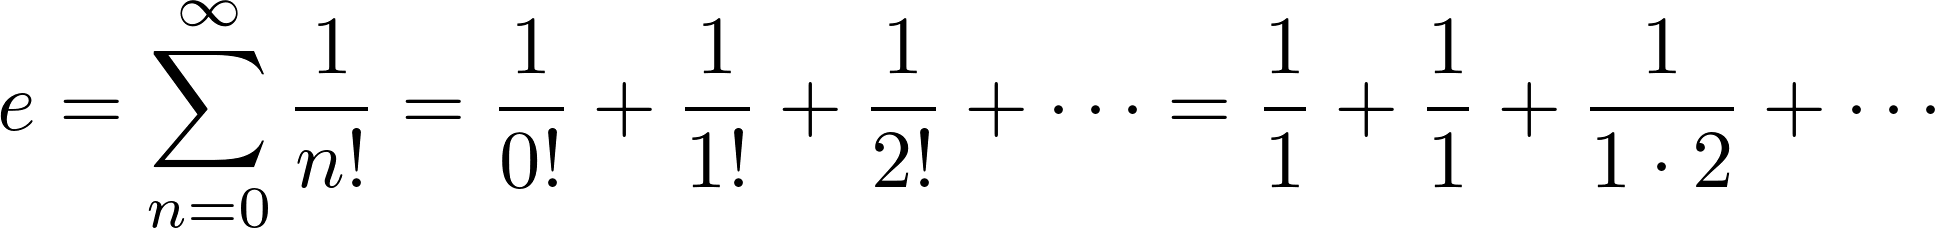

## Slowing Down Code
This next example might not seem very useful. Why would you want to slow down your Python code? Probably the most common use case is that you want to rate-limit a function that continuously checks whether a resource—like a web page—has changed. The @slow_down decorator will sleep one second before it calls the decorated function:

In [86]:
import functools
import time

def slow_down(func):
    """Sleep 1 second before calling the function"""
    @functools.wraps(func)
    def wrapper_slow_down(*args, **kwargs):
        time.sleep(1)
        return func(*args, **kwargs)
    return wrapper_slow_down

@slow_down
def countdown(from_number):
    if from_number < 1:
        print("Liftoff!")
    else:
        print(from_number)
        countdown(from_number - 1)

In [87]:
countdown(3)

3
2
1
Liftoff!


 The countdown() function is a recursive function. In other words, it’s a function calling itself. 

## Registering Plugins
Decorators don’t have to wrap the function they’re decorating. They can also simply register that a function exists and return it unwrapped. This can be used, for instance, to create a light-weight plug-in architecture:

In [89]:
import random
PLUGINS = dict()

def register(func):
    """Register a function as a plug-in"""
    PLUGINS[func.__name__] = func
    return func

@register
def say_hello(name):
    return f"Hello {name}"

@register
def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def randomly_greet(name):
    greeter, greeter_func = random.choice(list(PLUGINS.items()))
    print(f"Using {greeter!r}")
    return greeter_func(name)

The @register decorator simply stores a reference to the decorated function in the global PLUGINS dict. Note that you do not have to write an inner function or use @functools.wraps in this example because you are returning the original function unmodified.

The randomly_greet() function randomly chooses one of the registered functions to use. Note that the PLUGINS dictionary already contains references to each function object that is registered as a plugin:



In [90]:
PLUGINS

{'say_hello': <function __main__.say_hello(name)>,
 'be_awesome': <function __main__.be_awesome(name)>}

In [93]:
for i in range(3):
    print(randomly_greet("Alice"))

Using 'say_hello'
Hello Alice
Using 'be_awesome'
Yo Alice, together we are the awesomest!
Using 'say_hello'
Hello Alice


The main benefit of this simple plugin architecture is that you do not need to maintain a list of which plugins exist. That list is created when the plugins register themselves. This makes it trivial to add a new plugin: just define the function and decorate it with @register.

If you are familiar with globals() in Python, you might see some similarities to how the plugin architecture works. globals() gives access to all global variables in the current scope, including your plugins:

In [94]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'def add_one(number):\n    return number + 1\n\nadd_one(2)',
  'def say_hello(name):\n    return f"Hello {name}"\n\ndef be_awesome(name):\n    return f"Yo {name}, together we are the awesomest!"\n\ndef greet_bob(greeter_func):\n    return greeter_func("Bob")',
  "be_awesome('aa')",
  'greet_bob(be_awesome)',
  'print(greet_bob(say_hello))\n\nprint(greet_bob(be_awesome))',
  'def parent():\n    print("Printing from the parent() function")\n\n    def first_child():\n        print("Printing from the first_child() function")\n\n    def second_child():\n        print("Printing from the second_child() function")\n\n    second_child()\n    first_child()',
  'parent()',
  'second_child()',
  'def parent(num):\n    def f

Using the @register decorator, you can create your own curated list of interesting variables, effectively hand-picking some functions from globals().

## Is the User Logged In?
The final example before moving on to some fancier decorators is commonly used when working with a web framework. In this example, we are using Flask to set up a /secret web page that should only be visible to users that are logged in or otherwise authenticated:

```python
from flask import Flask, g, request, redirect, url_for
import functools
app = Flask(__name__)

def login_required(func):
    """Make sure user is logged in before proceeding"""
    @functools.wraps(func)
    def wrapper_login_required(*args, **kwargs):
        if g.user is None:
            return redirect(url_for("login", next=request.url))
        return func(*args, **kwargs)
    return wrapper_login_required

@app.route("/secret")
@login_required
def secret():
    ...
```

While this gives an idea about how to add authentication to your web framework, you should usually not write these types of decorators yourself. For Flask, you can use the [Flask-Login extension](https://flask-login.readthedocs.io/en/latest/#flask_login.login_required) instead, which adds more security and functionality.

## Fancy Decorators
So far, you’ve seen how to create simple decorators. You already have a pretty good understanding of what decorators are and how they work. Feel free to take a break from this article to practice everything you’ve learned.

In the second part of this tutorial, we’ll explore more advanced features, including how to use the following:
- Decorators on classes
- Several decorators on one function
- Decorators with arguments
- Decorators that can optionally take arguments
- Stateful decorators
- Classes as decorators

Decorating Classes
There are two different ways you can use decorators on classes. The first one is very close to what you have already done with functions: you can decorate the methods of a class. This was one of the motivations for introducing decorators back in the day.

Some commonly used decorators that are even built-ins in Python are @classmethod, @staticmethod, and @property. The @classmethod and @staticmethod decorators are used to define methods inside a class namespace that are not connected to a particular instance of that class. **The @property decorator is used to customize getters and setters for class attributes**. 

The following example demonstrates how to create a property in Python using the property() function.
```python
class person:
    def __init__(self):
        self.__name=''
    def setname(self, name):
        print('setname() called')
        self.__name=name
    def getname(self):
        print('getname() called')
        return self.__name
    def delname(self):
        print('delname() called')
        del self.__name
    name=property(getname, setname, delname)
    ```

The following code uses the built-in @property decorator to define the name property in the person class.

```python
class person:
    def __init__(self):
        self.__name=''
    @property
    def name(self):
        return self.__name
    @name.setter
    def name(self, value):
        self.__name=value
    @name.deleter
    def name(self, value):
        print('Deleting..')
        del self.__name        ```





Expand the box below for an example using these decorators.

The following definition of a Circle class uses the @classmethod, @staticmethod, and @property decorators:

In [3]:
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        """Get value of radius"""
        return self._radius

    @radius.setter
    def radius(self, value):
        """Set radius, raise error if negative"""
        if value >= 0:
            self._radius = value
        else:
            raise ValueError("Radius must be positive")

    @property
    def area(self):
        """Calculate area inside circle"""
        return self.pi() * self.radius**2

    def cylinder_volume(self, height):
        """Calculate volume of cylinder with circle as base"""
        return self.area * height

    @classmethod
    def unit_circle(cls):
        """Factory method creating a circle with radius 1"""
        return cls(1)

    @staticmethod
    def pi():
        """Value of π, could use math.pi instead though"""
        return 3.1415926535

In this class:

- .cylinder_volume() is a regular method.
- .radius is a mutable property: it can be set to a different value. However, by defining a setter method, we can do some error testing to make sure it’s not set to a nonsensical negative number. Properties are accessed as attributes without parentheses.
- .area is an immutable property: properties without .setter() methods can’t be changed. Even though it is defined as a method, it can be retrieved as an attribute without parentheses.
- .unit_circle() is a class method. It’s not bound to one particular instance of Circle. Class methods are often used as factory methods that can create specific instances of the class.
- .pi() is a static method. It’s not really dependent on the Circle class, except that it is part of its namespace. Static methods can be called on either an instance or the class.

The Circle class can for example be used as follows:

In [4]:
c = Circle(5)
c.radius

5

In [5]:
c.area

78.5398163375

In [7]:
c.radius = 2
c.area

12.566370614

In [8]:
c.area = 100

AttributeError: can't set attribute

In [9]:
c.cylinder_volume(height=4)

50.265482456

In [10]:
c.radius = -1
ValueError: Radius must be positive

SyntaxError: invalid syntax (<ipython-input-10-f9f75d7bd8f9>, line 2)

In [11]:
c = Circle.unit_circle()
c.radius

1

In [12]:
c.pi()

3.1415926535

In [13]:
Circle.pi()

3.1415926535

Let’s define a class where we decorate some of its methods using the @debug and @timer decorators from earlier:

In [14]:
import functools
import time

def debug(func):
    """Print the function signature and return value"""
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]                      
        # Create a list of the positional arguments. 
        # Use repr() to get a nice string representing each argument.
        
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]  
        # Create a list of the positional arguments. 
        # Use repr() to get a nice string representing each argument.
        # as key=value where the !r specifier means that repr() is used to 
        # represent the value.
        
        signature = ", ".join(args_repr + kwargs_repr)           
        # The lists of positional and keyword arguments is joined together 
        # to one signature string with each argument separated by a comma.
        
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__!r} returned {value!r}")           
        # The return value is printed after the function is executed.
        
        return value
    return wrapper_debug


def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()    # the time just before the function starts
        value = func(*args, **kwargs)
        end_time = time.perf_counter()      # the time just after the function finishes
        run_time = end_time - start_time    # The time the function takes
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer



Let’s define a class where we decorate some of its methods using the @debug and @timer decorators from earlier:

In [20]:
class TimeWaster:
    @debug
    def __init__(self, max_num):
        self.max_num = max_num

    @timer
    def waste_time(self, num_times):
        for _ in range(num_times):
            sum([i**2 for i in range(self.max_num)])

In [21]:
tw = TimeWaster(1000)

Calling __init__(<__main__.TimeWaster object at 0x109a41110>, 1000)
'__init__' returned None


In [22]:
tw.waste_time(999)

Finished 'waste_time' in 0.2491 secs


The other way to use decorators on classes is to decorate the whole class. This is, for example, done in the new [dataclasses](https://realpython.com/python-data-classes/) module in Python 3.7:

In [23]:
from dataclasses import dataclass

@dataclass
class DataClassCard:
    rank: str
    suit: str

In [26]:
queen_of_hearts = DataClassCard('Q', 'Hearts')
print(queen_of_hearts.rank)
queen_of_hearts

Q


DataClassCard(rank='Q', suit='Hearts')

In [27]:
queen_of_hearts == DataClassCard('Q', 'Hearts')

True

In [29]:
# A minimal regular class would look something like this:
class RegularCard:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

While this is not much more code to write, you can already see signs of the boilerplate pain: rank and suit are both repeated three times simply to initialize an object. Furthermore, if you try to use this plain class, you’ll notice that the representation of the objects is not very descriptive, and for some reason a queen of hearts is not the same as a queen of hearts:

In [30]:
queen_of_hearts = RegularCard('Q', 'Hearts')
print(queen_of_hearts.rank)
print(queen_of_hearts == RegularCard('Q', 'Hearts'))
queen_of_hearts

Q
False


Seems like data classes are helping us out behind the scenes. By default, data classes implement a `.__repr__()` method to provide a nice string representation and an `.__eq__()` method that can do basic object comparisons. For the RegularCard class to imitate the data class above, you need to add these methods as well:

In [32]:
class RegularCard:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return (f'{self.__class__.__name__}'
                f'(rank={self.rank!r}, suit={self.suit!r})')

    def __eq__(self, other):
        if other.__class__ is not self.__class__:
            return NotImplemented
        return (self.rank, self.suit) == (other.rank, other.suit)

In [33]:
queen_of_hearts = RegularCard('Q', 'Hearts')
print(queen_of_hearts.rank)
print(queen_of_hearts == RegularCard('Q', 'Hearts'))
queen_of_hearts

Q
True


RegularCard(rank='Q', suit='Hearts')

A common use of class decorators is to be a simpler alternative to some use-cases of [metaclasses](https://realpython.com/python-metaclasses/). In both cases, you are changing the definition of a class dynamically.

Writing a class decorator is very similar to writing a function decorator. The only difference is that the decorator will receive a class and not a function as an argument. In fact, all the decorators you saw above will work as class decorators. When you are using them on a class instead of a function, their effect might not be what you want. In the following example, the @timer decorator is applied to a class:

In [44]:
def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()    # the time just before the function starts
        value = func(*args, **kwargs)
        end_time = time.perf_counter()      # the time just after the function finishes
        run_time = end_time - start_time    # The time the function takes
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer


@timer
class TimeWaster:
    def __init__(self, max_num):
        self.max_num = max_num

    def waste_time(self, num_times):
        for _ in range(num_times):
            sum([i**2 for i in range(self.max_num)])

Decorating a class does not decorate its methods. Recall that @timer is just shorthand for TimeWaster = timer(TimeWaster).

Here, @timer only measures the time it takes to instantiate the class:

In [45]:
tw = TimeWaster(1000)

Finished 'TimeWaster' in 0.0000 secs


In [46]:
a = tw.waste_time(999)

## Nesting Decorators
You can apply several decorators to a function by stacking them on top of each other:

In [48]:
import functools

def debug(func):
    """Print the function signature and return value"""
    @functools.wraps(func)
    def wrapper_debug(*args, **kwargs):
        args_repr = [repr(a) for a in args]                              
        kwargs_repr = [f"{k}={v!r}" for k, v in kwargs.items()]          
        signature = ", ".join(args_repr + kwargs_repr)                  
        print(f"Calling {func.__name__}({signature})")
        value = func(*args, **kwargs)
        print(f"{func.__name__!r} returned {value!r}")                   
        return value
    return wrapper_debug

def do_twice(func):
    def wrapper_do_twice(*args, **kwargs):
        func(*args, **kwargs)
        func(*args, **kwargs)
    return wrapper_do_twice

@debug
@do_twice
def greet(name):
    print(f"Hello {name}")

In [49]:
greet("Eva")

Calling wrapper_do_twice('Eva')
Hello Eva
Hello Eva
'wrapper_do_twice' returned None


In [51]:
# Observe the difference if we change the order of @debug and @do_twice:
@do_twice
@debug
def greet(name):
    print(f"Hello {name}")

greet("Eva")

Calling greet('Eva')
Hello Eva
'greet' returned None
Calling greet('Eva')
Hello Eva
'greet' returned None


## Decorators With Arguments
Sometimes, it’s useful to **pass arguments to your decorators**. For instance, @do_twice could be extended to a @repeat(num_times) decorator. The number of times to execute the decorated function could then be given as an argument.

This would allow you to do something like this:

In [52]:
@repeat(num_times=4)
def greet(name):
    print(f"Hello {name}")

NameError: name 'repeat' is not defined

So far, the name written after the @ has referred to a function object that can be called with another function. To be consistent, you then need repeat(num_times=4) to return a function object that can act as a decorator. Luckily, you already know how to return functions! In general, you want something like the following:



In [56]:
def repeat(num_times):
    def repeat_decortor(func):
        def wrapper_repeat_decortor(*args, **kwargs):
            for i in range(num_times):
                func(*args, **kwargs)
        return wrapper_repeat_decortor
    return repeat_decortor



In [57]:
@repeat(num_times=4)
def greet(name):
    print(f"Hello {name}")

In [58]:
greet('aa')

Hello aa
Hello aa
Hello aa
Hello aa


Typically, the decorator creates and returns an inner wrapper function, so writing the example out in full will give you an inner function within an inner function. While this might sound like the programming equivalent of the Inception movie, we’ll untangle it all in a moment:

In [60]:
def repeat(num_times):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            for _ in range(num_times):
                value = func(*args, **kwargs)
            return value
        return wrapper_repeat
    return decorator_repeat

It looks a little messy, but we have only put the same decorator pattern you have seen many times by now inside one additional def that handles the arguments to the decorator. Let’s start with the innermost function:

```python
def wrapper_repeat(*args, **kwargs):
    for _ in range(num_times):
        value = func(*args, **kwargs)
    return value
```

This wrapper_repeat() function takes arbitrary arguments and returns the value of the decorated function, func(). This wrapper function also contains the loop that calls the decorated function num_times times. This is no different from the earlier wrapper functions you have seen, except that it is using the num_times parameter that must be supplied from the outside.

One step out, you’ll find the decorator function:

```python
def decorator_repeat(func):
    @functools.wraps(func)
    def wrapper_repeat(*args, **kwargs):
        ...
    return wrapper_repeat
```
Again, decorator_repeat() looks exactly like the decorator functions you have written earlier, except that it’s named differently. That’s because we reserve the base name—repeat()—for the outermost function, which is the one the user will call.

As you have already seen, the outermost function returns a reference to the decorator function:
```python
def repeat(num_times):
    def decorator_repeat(func):
        ...
    return decorator_repeat
```
There are a few subtle things happening in the repeat() function:

- Defining decorator_repeat() as an inner function means that repeat() will refer to a function object—decorator_repeat. Earlier, we used repeat without parentheses to refer to the function object. The added parentheses are necessary when defining decorators that take arguments.
- The num_times argument is seemingly not used in repeat() itself. But by passing num_times a closure is created where the value of num_times is stored until it will be used later by wrapper_repeat().

In [61]:
import functools

def repeat(num_times):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            for _ in range(num_times):
                value = func(*args, **kwargs)
            return value
        return wrapper_repeat
    return decorator_repeat

In [62]:
@repeat(num_times=4)
def greet(name):
    print(f"Hello {name}")
    
greet("World")

Hello World
Hello World
Hello World
Hello World


## Both Please, But Never Mind the Bread
With a little bit of care, you can also define decorators that can be used both with and without arguments. Most likely, you don’t need this, but it is nice to have the flexibility.

As you saw in the previous section, when a decorator uses arguments, you need to add an extra outer function. The challenge is for your code to figure out if the decorator has been called with or without arguments.

Since the function to decorate is only passed in directly if the decorator is called without arguments, the function must be an optional argument. This means that the decorator arguments must all be specified by keyword. You can enforce this with the special * syntax, which means that all following parameters are keyword-only:

```python
def name(_func=None, *, kw1=val1, kw2=val2, ...):  # 1
    def decorator_name(func):
        ...  # Create and return a wrapper function.

    if _func is None:
        return decorator_name                      # 2
    else:
        return decorator_name(_func)               # 3
```

Here, the _func argument acts as a marker, noting whether the decorator has been called with arguments or not:

1. If name has been called without arguments, the decorated function will be passed in as _func. If it has been called with arguments, then _func will be None, and some of the keyword arguments may have been changed from their default values. The * in the argument list means that the remaining arguments can’t be called as positional arguments.
2. In this case, the decorator was called with arguments. Return a decorator function that can read and return a function.
3. In this case, the decorator was called without arguments. Apply the decorator to the function immediately.

Using this boilerplate on the @repeat decorator in the previous section, you can write the following:

In [63]:
def repeat(_func=None, *, num_times=2):
    def decorator_repeat(func):
        @functools.wraps(func)
        def wrapper_repeat(*args, **kwargs):
            for _ in range(num_times):
                value = func(*args, **kwargs)
            return value
        return wrapper_repeat

    if _func is None:
        return decorator_repeat
    else:
        return decorator_repeat(_func)

Compare this with the original @repeat. The only changes are the added _func parameter and the if-else at the end.

In [66]:
@repeat
def say_whee():
    print("Whee!")

@repeat(num_times=3)
def greet(name):
    print(f"Hello {name}")

## Stateful Decorators
Sometimes, it’s useful to have a decorator that can keep track of state. As a simple example, we will create a decorator that counts the number of times a function is called.

```text
Note: In the beginning of this guide, we talked about pure functions returning a value based on given arguments. Stateful decorators are quite the opposite, where the return value will depend on the current state, as well as the given arguments.
```
In the next section, you will see how to use classes to keep state. But in simple cases, you can also get away with using function attributes:

In [72]:
import functools

def count_calls(func):
    @functools.wraps(func)
    def wrapper_count_calls(*args, **kwargs):
        wrapper_count_calls.num_calls += 1
        print(f"Call {wrapper_count_calls.num_calls} of {func.__name__!r}")
        return func(*args, **kwargs)
    wrapper_count_calls.num_calls = 0
    return wrapper_count_calls

@count_calls
def say_whee():
    print("Whee!")

The state—the number of calls to the function—is stored in the function attribute .num_calls on the wrapper function. Here is the effect of using it:

In [73]:
say_whee()

Call 1 of 'say_whee'
Whee!


In [74]:
say_whee()

Call 2 of 'say_whee'
Whee!


In [75]:
say_whee.num_calls

2

## Classes as Decorators
The typical way to maintain state is by using classes. In this section, you’ll see how to rewrite the @count_calls example from the previous section using a class as a decorator.

Recall that the decorator syntax @my_decorator is just an easier way of saying func = my_decorator(func). Therefore, if my_decorator is a class, it needs to take func as an argument in its .__init__() method. Furthermore, the class needs to be callable so that it can stand in for the decorated function.

For a class to be callable, you implement the special .__call__() method:

In [79]:
class Counter:
    def __init__(self, start=0):
        self.count = start

    def __call__(self):
        self.count += 1
        print(f"Current count is {self.count}")

The `.__call__()` method is executed each time you try to call an instance of the class:

In [80]:
counter = Counter(4)
counter()

Current count is 5


In [81]:
counter()

Current count is 6


Therefore, a typical implementation of a decorator class needs to implement `.__init__()` and `.__call__()`:



In [82]:
import functools

class CountCalls:
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.num_calls = 0

    def __call__(self, *args, **kwargs):
        self.num_calls += 1
        print(f"Call {self.num_calls} of {self.func.__name__!r}")
        return self.func(*args, **kwargs)

@CountCalls
def say_whee():
    print("Whee!")

The `.__init__()` method must store a reference to the function and can do any other necessary initialization. The `.__call__()` method will be called instead of the decorated function. It does essentially the same thing as the wrapper() function in our earlier examples. Note that you need to use the functools.update_wrapper() function instead of @functools.wraps.

This @CountCalls decorator works the same as the one in the previous section:

In [83]:
say_whee()

Call 1 of 'say_whee'
Whee!


In [84]:
say_whee()

Call 2 of 'say_whee'
Whee!


In [85]:
say_whee.num_calls

2